# Different Configuration Using Maro's Kmeans

This Notebook aimed at replicating Maro's work in the parper Mid-air Gesture Recognition Using Event-Based Vision Sensor

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansMaro import KmeansMaro

# Defining Common parameter

In [3]:
tau = 0.02
R = 2
nb_cluster = [4, 8, 16]
ImageSize = (32, 32)
DataPath = "../data/alphabet_ExtractedStabilized.mat"
LabelPath = "../data/alphabet_label.pkl"

# Experiment with one polarity in input  

## Exp1 :  Maro Kmeans + Linear Kernel +  NoiseFilter(=2)  +  1 Polarity in Input + 3 Cycles

In [4]:
%mkdir -p ../Records/EXP_02_MaroKmeans

In [5]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)

In [6]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear"
)
L2 = ClusteringLayer(
    tau=10 * tau, R=2 * R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear"
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="linear",
)
Net = Network([L1, L2, L3])

fname = "../Records/EXP_02_MaroKmeans/Exp01_2020-04-17.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )

    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)

prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)


battacha:95.0% ### normalized:90.0% ### euclidian:92.5% ### 


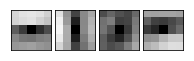

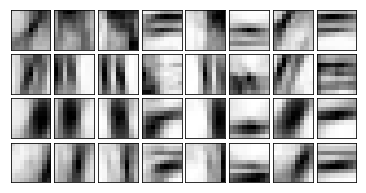

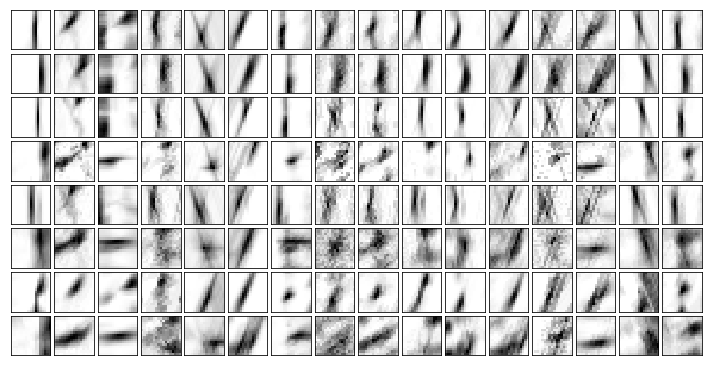

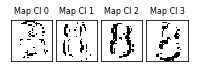

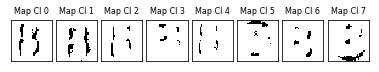

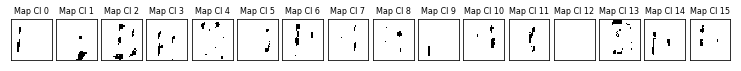

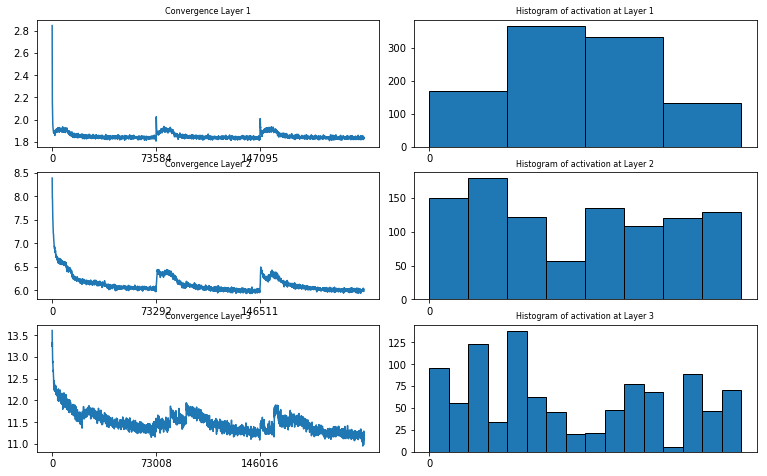

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("../data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

The classification is highly varying with the number of training cycle (event at convergence). This may be cause by the noise on the convergence curve. An hypothesis, could be that the learning coefficient may be too high to reach to a stable convergence

## Exp2 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) +  1 Polarity in Input + 3 Cycles

In [8]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="exponential"
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
Net = Network([L1, L2, L3])

fname = "../Records/EXP_02_MaroKmeans/Exp02_2020-04-17.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:100.0% ### normalized:95.0% ### euclidian:97.5% ### 


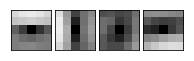

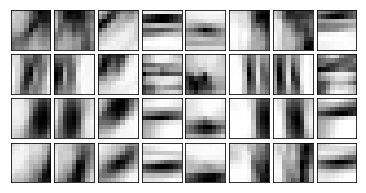

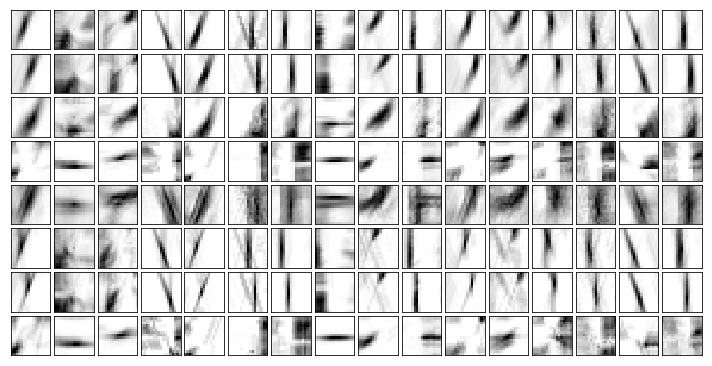

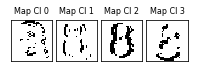

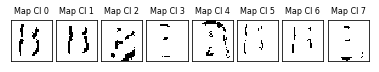

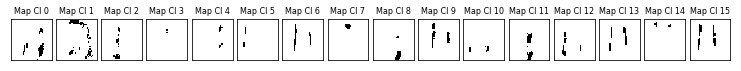

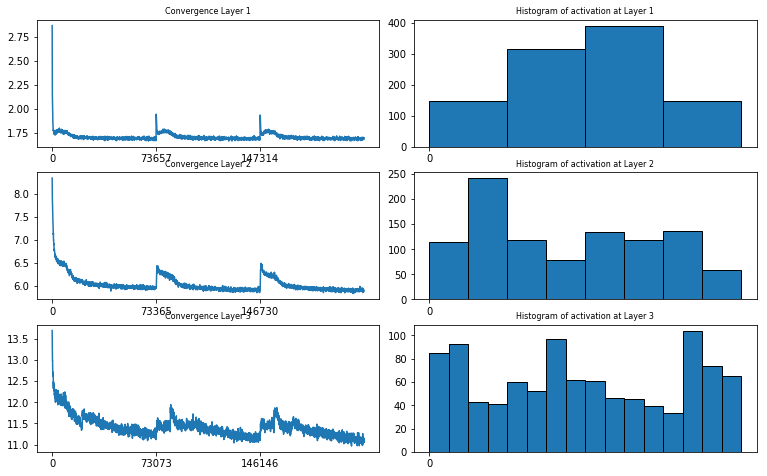

In [9]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("../data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

# Experiment with 2 polarities in Input 

## Exp3 : Maro Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles


In [10]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)


## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear"
)
L2 = ClusteringLayer(
    tau=10 * tau, R=2 * R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear"
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="linear",
)
Net = Network([L1, L2, L3])


fname = "../Records/EXP_02_MaroKmeans/Exp03_2020-04-17.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:100.0% ### normalized:95.0% ### euclidian:97.5% ### 


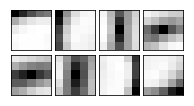

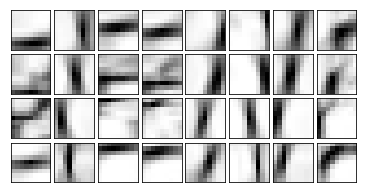

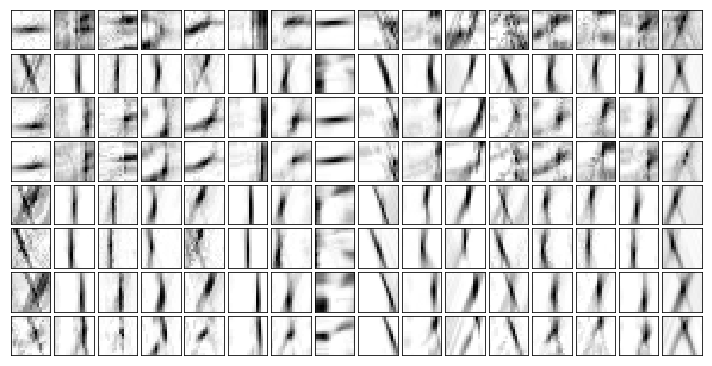

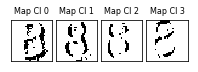

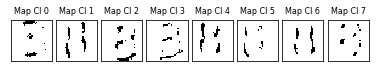

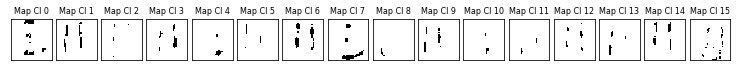

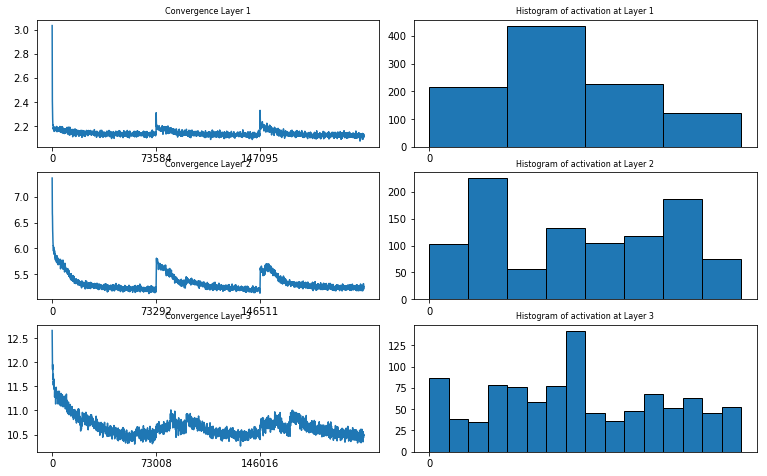

In [11]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("../data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## Exp4 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [12]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="exponential"
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
Net = Network([L1, L2, L3])

fname = "../Records/EXP_02_MaroKmeans/Exp04_2020-04-17.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:95.0% ### normalized:92.5% ### euclidian:95.0% ### 


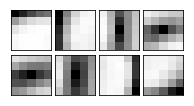

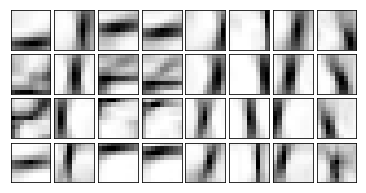

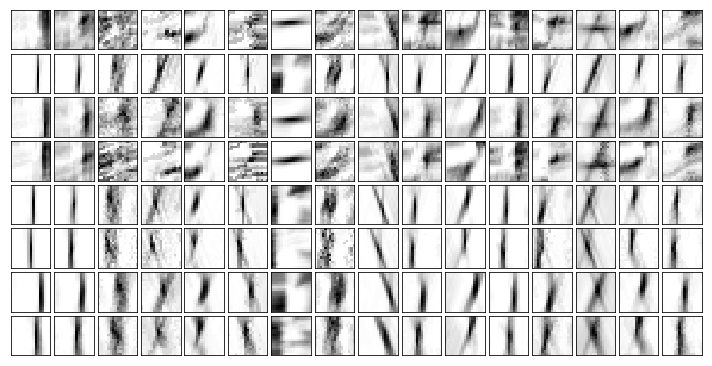

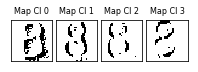

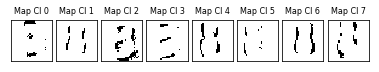

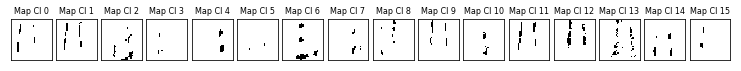

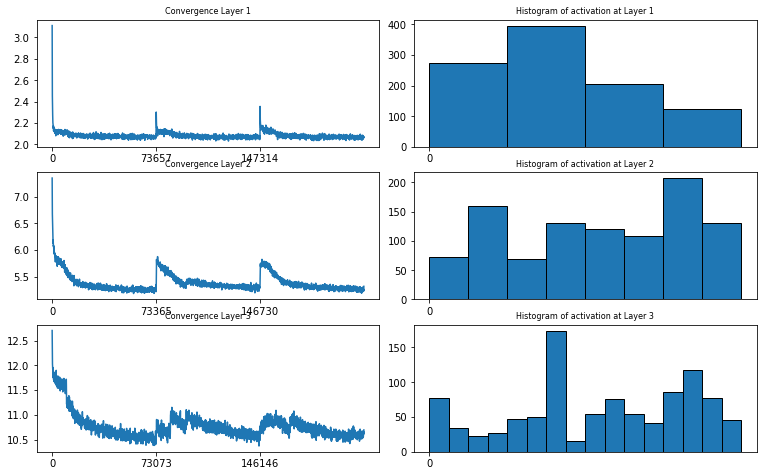

In [13]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("../data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])